<div class="alert alert-info">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Привет. Меня зовут Алина Гусева, я буду делать ревью к твоей работе по исследовательскому анализу данных. В дальнейшем предлагаю общаться на "ты".
    
Видно, что ты старалась, делая проект. Все ключевые этапы проекта выполнены, в целом тебе удалось со всем справиться. Особенно хочется отметить, что соблюдена структура проекта, а код написан аккуратно.
    
Для того, чтобы и тебе и мне удобнее было ориентироваться в комментариях, я буду помечать их разными цветами:
- красный цвет означает комментарии, которые требуют доработки. Как только ты их исправишь - проект будет принят;
- желтый цвет - то, что в следующий раз можно будет сделать по-другому. На твое усмотрение можешь доделать маленькие правки сейчас или учесть замечание для выполнения следующих проектов;
- зеленый цвет - очень элегантные и удачные решение, которые желательно использовать в дальнейшей работе.
- синий цвет - информация
    
Предлагаю работать над проектом в диалоге: если ты что-то изменяешь или вносишь какие-то коррективы - выделяй это каким-нибудь цветом и пиши об этом мне. Так мне гораздо легче будет отследить сделанные изменения.
    
Также попрошу тебя не изменять и не удалять мои комментарии, чтобы проверка твоего самостоятельного проекта прошла оперативнее.
    
 
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.sample(n=5, random_state=5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12847,0,3500000.0,46.0,2016-06-23T00:00:00,2,NaN,5.0,32.0,2,False,False,False,6.0,1.0,Санкт-Петербург,22083.0,769.0,0.0,NaN,2.0,249.0,6.0
12205,5,5450000.0,48.0,2019-04-30T00:00:00,2,2.5,9.0,31.0,5,NaN,False,False,8.0,1.0,Санкт-Петербург,41832.0,10003.0,0.0,NaN,0.0,NaN,NaN
4587,20,12100000.0,97.0,2018-03-03T00:00:00,3,2.8,4.0,NaN,4,NaN,False,False,NaN,NaN,Санкт-Петербург,25277.0,4091.0,1.0,549.0,1.0,698.0,220.0
6551,5,5250000.0,34.2,2019-02-21T00:00:00,1,2.8,10.0,14.2,4,NaN,False,False,8.0,2.0,Санкт-Петербург,19092.0,4441.0,0.0,NaN,0.0,NaN,43.0
10885,19,5150000.0,41.0,2017-11-17T00:00:00,1,NaN,24.0,18.0,20,NaN,False,False,10.0,1.0,Санкт-Петербург,7201.0,13417.0,1.0,1199.0,0.0,NaN,60.0


### Вывод

In [2]:
#Посмотрим в каких столбцах есть пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Хороший тон использовать метод info() для получения общей информации из таблицы. Для более детального изучения можно воспользоваться методом describe()
    
 
</div>

## Предобработка данных

In [3]:
#Напишем функцию, чтобы определять долю пропущенных значений. 
#Если их больше 10%, то нужно думать как их заменить
def nan_ratio(column):
    return print(data[column].isna().value_counts() / len(data))

In [4]:
nan_ratio('airports_nearest')

False    0.76615
True     0.23385
Name: airports_nearest, dtype: float64


In [5]:
#Пропущенные значения в поле балконы, скорее всего означает, что балкона нет,
#поэтому можем заменить его нулями
data['balcony'] = data['balcony'].fillna(0)
#Такая же логика справедлива для парков и водоемов
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
#Растояние до парка и водоема в радиусе 3 км, логично, что парк находятся дальше
# чем 3км, поэтому можем заменить его на 31000
data['parks_around3000'] = data['parks_around3000'].fillna(3100)
data['ponds_around3000'] = data['ponds_around3000'].fillna(3100)
#Пропуски в столбце апартаменты ли это, можно заменить на 0
data['is_apartment'] = data['is_apartment'].fillna(0).astype(int)

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, абсолютно верно! Если не указано количество балконов, то скорее всего их в квартире нет. Аналогичная ситуация и с апартаментами. Остальные столбцы, упомянутые выше, заполняются автоматически, исходя из геолокации.

In [6]:
#Для следующих столбцов правомерно заменить пропущенные значения на медианные, так как расспределение у них ненормальное
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Здесь важно обратить внимание на столбец с высотой потолка, так как он пригодится для дальнейшего исследования. Можно заменить медианой, но лучше сделать более точечную замену, например, сначала сгруппировать данные по этажности дома, а затем заменять на медианные относительно этих групп. Обычно однотипные дома стоятся по одному и тому же проекту.
    
 
</div>

Поля жилая площадь и площадь квартиры являются потенциально важными для нашего анализа, поэтому их важно заполнить максимально точно. Есть предположение, что общая площадь и жилая площадь линейно связаны, поэтому для заполнения пропусков я хочу посчитать коэффициенты линейной регрессии для этой связи.

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = data['living_area'].fillna(data['living_area'].mean()).reset_index(drop=True).values.reshape((-1, 1))
y = data['total_area'].fillna(data['total_area'].mean()).reset_index(drop=True)
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#Оценка регрессии высокая, следовательно, связь переменных действительно есть
regressor.score(X, y)

0.7689844239659388

In [9]:
slope = regressor.coef_
intercept = regressor.intercept_

In [10]:
data['living_area'] = data['living_area'].fillna(intercept + slope*data['total_area'])
data['total_area'] = data['total_area'].fillna(intercept + slope*data['living_area'])

In [11]:
#Попробуем применить аналогичный анализ для оуценки кухни с помощью общей площади
regressor = LinearRegression()
X_k = data['kitchen_area'].fillna(data['kitchen_area'].mean()).reset_index(drop=True).values.reshape((-1, 1))
y_k = data['total_area'].fillna(data['total_area'].mean()).reset_index(drop=True)
regressor.fit(X_k, y_k)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#Связь в разы менее выраженная, но за неменеем лучшего будем использовать данную модель, чтобы вставить коэфициенты
regressor.score(X_k, y_k)

0.323757990781568

In [13]:
slope_k = regressor.coef_
intercept_k = regressor.intercept_

In [14]:
data['kitchen_area'] = data['kitchen_area'].fillna(intercept_k  + slope_k*data['total_area'])

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Достаточно необычный способ, молодец) Видно, что есть бэкграунд))
 
</div>

In [15]:
#Проверям, что теперь у нас нет пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around30

In [16]:
#Расстояние до парка или водоема нам интересно скорее примерно, поэтому можем поменять его тип
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
# Число балконов целая величина, поэтому можно заменить его тип
data['balcony'] = data['balcony'].astype('int')

В данных было множество пропусков, в будущем нужно будет поговорить с коллегами о том, чтобы сделать важные поля такие как площадь квартиры или площадь комнат, обязательными для заполнения. 

## Рассчёты и добавление результатов в таблицу

In [17]:
#Добавим цену за квадратный метр
data['price_per_sqm'] = round(data['last_price'] / data['total_area'])

In [18]:
#Разделим дату на день недели, месяц и год
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [19]:
#Создадим категории для этажа квартиры
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

In [20]:
#Добавим графу соотношений
data['living_area_ratio'] = round(data['living_area'] / data['total_area'])
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'])

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Теперь все столбцы имеют корректный тип данных, можно приступать к анализу.
 
</div>

## Исследовательский анализ данных

(0, 150)

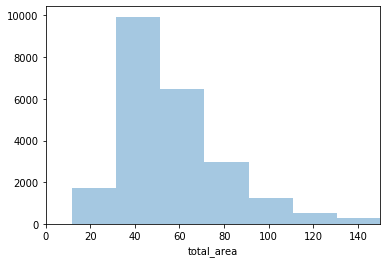

In [21]:
#Изучим следующие параметры: площадь, цена, число комнат, высота потолков.
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['total_area'], kde=False, bins=45)
plt.xlim(0, 150)

<div class="alert alert-warning">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Для большей наглдяности советую тебе подписывать названия графиков и оси.
 
</div>

Большинство продоваемых квартир имеют площадь от 40 до 60 квм.

(0, 15000000)

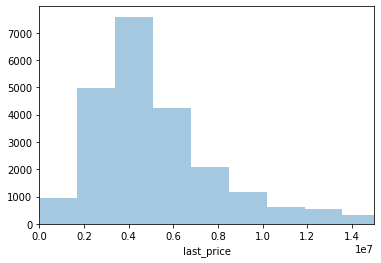

In [22]:
sns.distplot(data['last_price'], kde=False, bins=450)
plt.xlim(0, 15000000)

Большинство продоваемых квартир стоят от 4 до 6 млн рублей.

(1, 7)

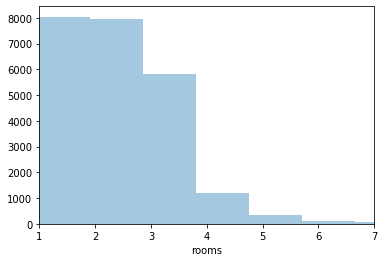

In [23]:
sns.distplot(data['rooms'], kde=False, bins=20)
plt.xlim(1, 7)

Большинство квартир 1-2 комнатные.

(2, 5)

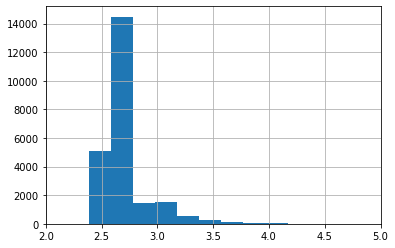

In [24]:
data['ceiling_height'].hist(bins=500)
plt.xlim(2, 5)

У большинства квартир потолки порядка 2,4 метров. 

In [25]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0, 800)

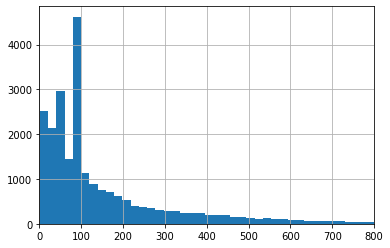

In [26]:
data['days_exposition'].hist(bins=80)
plt.xlim(0, 800)

Средний срок размещения объявления до продажи 2-3 месяца. Если квартира продается быстрее, чем за месяц, то такие сделки лучше проверить, на предмет предварительной договоренности или какого-то мошеничества. Если квартира продается дольше 15 месяцев(450 дней), то это уже подозрительно долгая продажа, следует дать рекомендации продавцу, что-то изменить, снизить цену или сделать ремонт :)

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, все так! В среднем продажа занимет 2-3 месяца, а вот если сделка совершилась намнго раньше,  то продажу можно считать быстрой.
 
</div>

(0, 800)

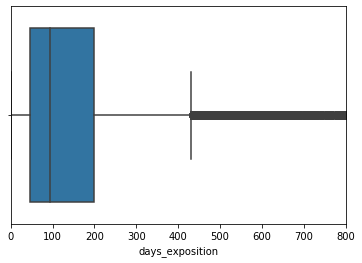

In [27]:
sns.boxplot(data['days_exposition'])
plt.xlim(0, 800)

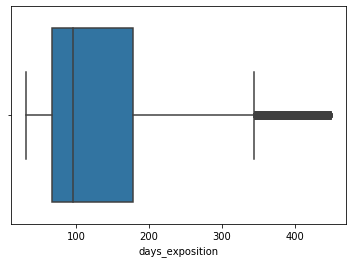

In [28]:
# Исходя из предыдущи наблюдений удалим квартиры, которые имеют странный срок продажи, либо меньше месяца, либо более 450 дней
data = data.query('30 < days_exposition < 450')
sns.boxplot(data['days_exposition'])

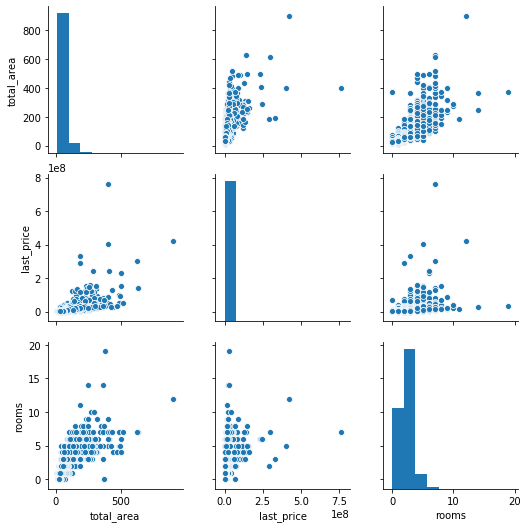

In [29]:
sns.pairplot(data, vars=['total_area', 'last_price', 'rooms'])


(0, 60000000)

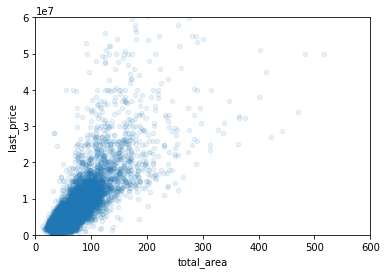

In [30]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
plt.xlim(0, 600)
plt.ylim(0, 60000000)

In [31]:
from scipy.stats import pearsonr
pearsonr(data.total_area, data.last_price)


(0.642813606438716, 0.0)

Можно видеть корреляцию между площадью и ценой квартиры. Особено она сильна при маленьком метраже, при метраже свыше 100 квм связь становитяся все слабее.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, но тут оказывает влияние количество обхявлений. Ведь квартир сметражом более 100 м2 не так уж и много.
    
 
</div>

(0, 90000000)

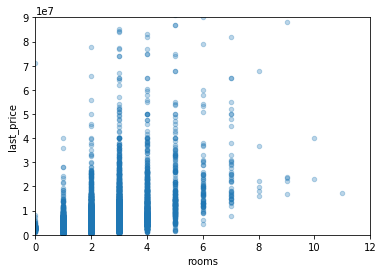

In [32]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3) 
plt.xlim(0, 12)
plt.ylim(0, 90000000)

In [33]:
pearsonr(data.rooms, data.last_price)

(0.34917973779879674, 0.0)

Можно видеть, что связи числа комнат и ценны практически нет. Возможно, это связанно с неравным числом наблюдений и маленьким размахом шкалы число комнат. Мы можем лишь заметить, что трех и четырехкомнатные квартиры в среднем дороже, чем 1-2 комнатные.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Как думаешь, что означает количество комнат равное 0 в данных?
    
 
</div>

(0, 60000000)

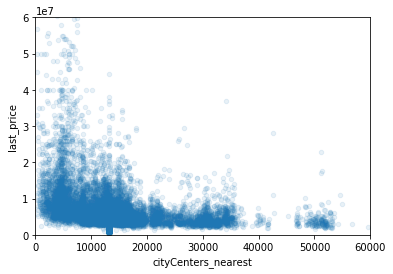

In [34]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1) 
plt.xlim(0, 60000)
plt.ylim(0, 60000000)

Любопытно, что цена сильно влияет на стоимость для удаленности от центра не более чем на 10 км, дальше связь сильно ослабевает.

(0, 25000000)

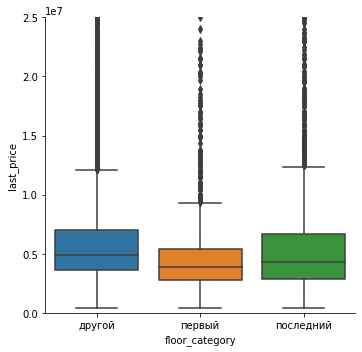

In [35]:
sns.catplot(x='floor_category', y='last_price', kind="box", data=data)
plt.ylim(0, 25000000)

Этажи почти не отличаются между собой, первый немного дешевле последнего и другого.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, это факт, цена квартиры на первом этаже неного меньше, чем на остальных.
 
</div>

(0, 25000000)

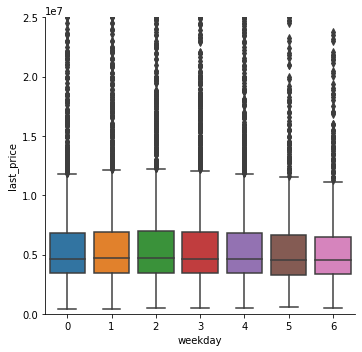

In [36]:
sns.catplot(x='weekday', y='last_price', kind='box', data=data)
plt.ylim(0, 25000000)

Разницы в днях недели фактически нет.

(0, 25000000)

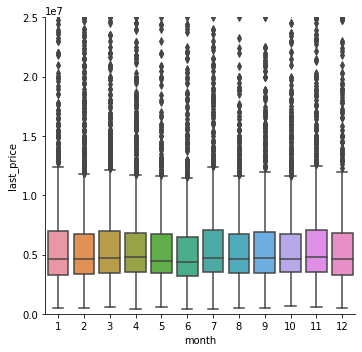

In [37]:
sns.catplot(x='month', y='last_price', kind='box', data=data)
plt.ylim(0, 25000000)

Месяца фактически не отличаются между собой.

(0, 50000000)

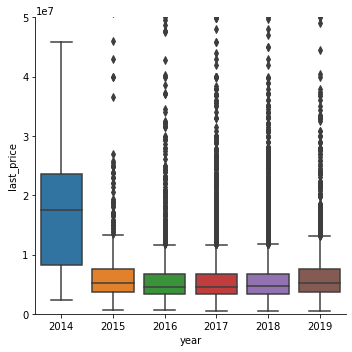

In [38]:
sns.catplot(x='year', y='last_price', kind='box', data=data)
plt.ylim(0, 50000000)

В 2014 средняя цена квартиры была значимо выше, чем в последующие годы. В 2014 было резкое падение российского рубля, чем можно объяснить подобный рост цен. 

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Если смотреть в разрезе дней и месяцев, то можно сказать, что наблюдается некая сезонность. А вот в разарезе нескольких лет видно, как цена резуо упала. Да, это связано с экономической ситуацией в стране. Но, опять же, тут нужно учитывать количество объявлений, есть подозорение, что данных за 2014 крайне мало.
    
 
</div>

In [39]:
#Выбераем 10 населённых пунктов с наибольшим числом объявлений. 
local_price_per_sqm = data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'median'])
local_price_per_sqm.columns = ['count', 'median']
local_price_per_sqm.sort_values('count', ascending=False).head(10)
# C наименьшим
local_price_per_sqm.sort_values('count', ascending=False).tail(10)


,count,median
locality_name,,
посёлок Жилгородок,1,50000.0
посёлок Дзержинского,1,33439.0
коттеджный поселок Кивеннапа Север,1,36364.0
посёлок Высокоключевой,1,34932.0
коттеджный посёлок Лесное,1,45690.0
поселок Барышево,1,32432.0
посёлок Белоостров,1,66667.0
поселок Возрождение,1,29054.0
посёлок Алексеевка,1,22222.0


In [40]:
#Выделяем квартиры в Санкт-Петербурге 
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [41]:
data_spb['km_center'] = round(data_spb['cityCenters_nearest'] / 1000, 0)
spb_km_price = data_spb.pivot_table(index='km_center', values=['price_per_sqm', 'last_price'], aggfunc='mean')
spb_km_price.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,last_price,price_per_sqm
km_center,,
0.0,2.858545e+07,217996.894737
1.0,2.314433e+07,186445.661417
2.0,1.797382e+07,160716.641256
3.0,1.144391e+07,123964.332046
4.0,1.394241e+07,135194.879098


(0, 60000000)

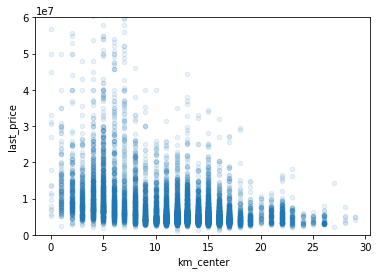

In [42]:
data_spb.plot(x='km_center', y='last_price', kind='scatter', alpha=0.1) 
plt.ylim(0, 60000000)

(0, 1250000)

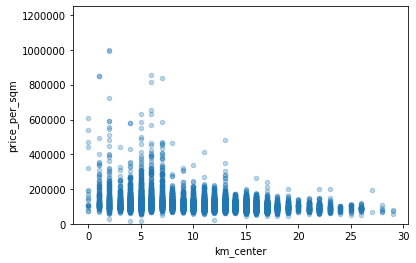

In [43]:
data_spb.plot(x='km_center', y='price_per_sqm', kind='scatter', alpha=0.3) 
plt.ylim(0, 1250000)

На обоих графиках можно видеть сильное понижение цены после 8 км от центра. Из этого можно сделать вывод, что примерно там заканчивается центральная часть города.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Все так, центральными будем считать квартиры, расположенные в пределах 8 км.
    
 
</div>

In [44]:
#Выделяем сегмент квартир в центре. 

In [45]:
spb_center = data_spb[data_spb['km_center'] <= 8]

(1, 7)

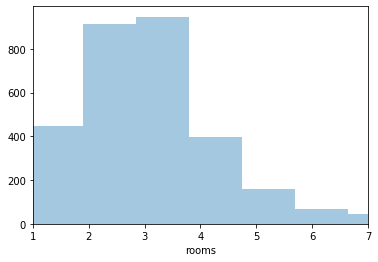

In [46]:
sns.distplot(spb_center['rooms'], kde=False, bins=20)
plt.xlim(1, 7)

В центре Питербурга 2-3 комнатных квартир, в отличии от 1-2 как во всей выборке. 

(0, 15000000)

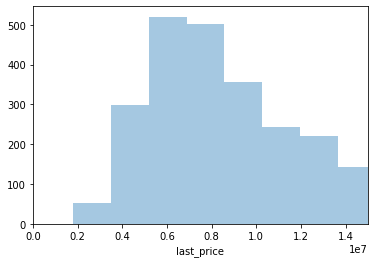

In [47]:
sns.distplot(spb_center['last_price'], kde=False, bins=450)
plt.xlim(0, 15000000)

Средняя цена за квартиру выше в центре питера, чем в среднем по выборке.

(0, 150)

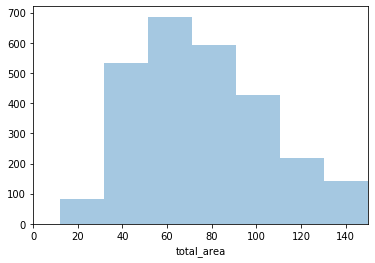

In [48]:
sns.distplot(spb_center['total_area'], kde=False, bins=45)
plt.xlim(0, 150)

Средняя площадь квартир тоже в больше, чем в среднем по выборке.

(2, 5)

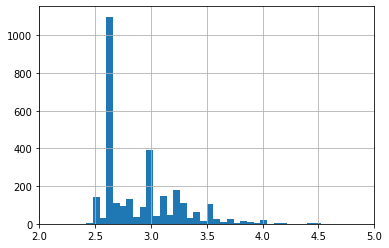

In [49]:
spb_center['ceiling_height'].hist(bins=500)
plt.xlim(2, 5)

Потолки чуть выше, чем в среднеем по выборке и большинство значений пренадлежать точке 2,7. Это может быть связано с тем, что дома в центре примерно одного стандарта застройки.

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Основное отличие квартир центрального района --- это конечно еже цена, логично предположить, что здесь она явно будет выше. Еще одно отличие --- наличие высоких потолокв и бОльшего числа комнат, возможно даже сохранились коммуналки. В основном это связанно с нетипичной застройкой.
   
 
</div>

(0, 60000000)

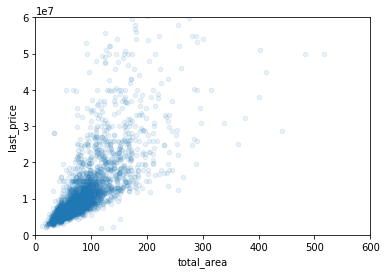

In [50]:
spb_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
plt.xlim(0, 600)
plt.ylim(0, 60000000)

Связь цены и площади сильнее и линейнее, чем в среднем по выборке и так же сильнее для маленьких площадей.

(0, 90000000)

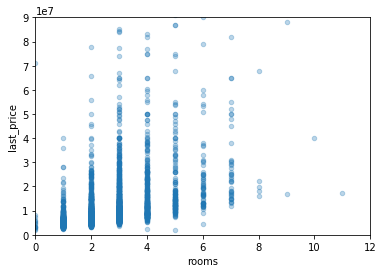

In [51]:
spb_center.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3) 
plt.xlim(0, 12)
plt.ylim(0, 90000000)

Число чуть сильнее влияет на стоимость, чем в среднем по выборке.

(0, 1250000)

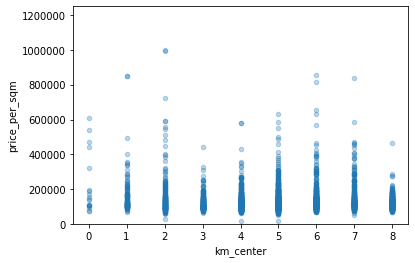

In [52]:
spb_center.plot(x='km_center', y='price_per_sqm', kind='scatter', alpha=0.3) 
plt.ylim(0, 1250000)

Внутри центра различия в расстоянии не так сильно влияют, мы можем видеть два слабых пика, на 2 и на 6 км, можно предположить, что инфраструктура примерно на этом расстоянии самая благоприятная или там рассположен парк, это гипотезы, которые еще надо проверить :)

<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>
Да, тут не совсем корректно сравнивать цены в этих пределах, и так понятно, что они выше чем в спальном районе. Из этого возникает вопрос, что именно считать самым центром, откуда ведется отсчет 8 км)
    
 
</div>

(0, 25000000)

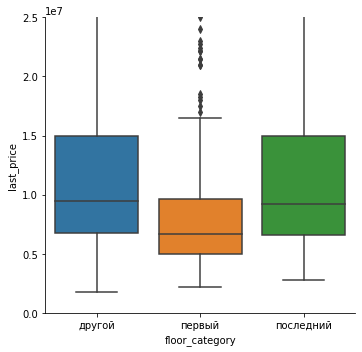

In [53]:
sns.catplot(x='floor_category', y='last_price', kind="box", data=spb_center)
plt.ylim(0, 25000000)

Снижение стоимости для первого этажа для центра Питербурга видно сильнее, чем в целом по ввыборке, что может быть связано с тем, что в центре шумнее и дискомфортнее жить на первом этаже.

(0, 25000000)

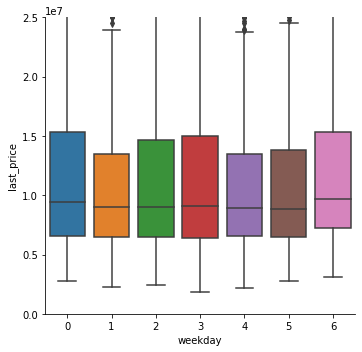

In [54]:
sns.catplot(x='weekday', y='last_price', kind='box', data=spb_center)
plt.ylim(0, 25000000)

Стоимость по дням недели не сильно отличается.

(0, 25000000)

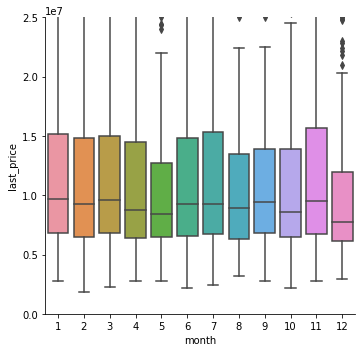

In [55]:
sns.catplot(x='month', y='last_price', kind='box', data=spb_center)
plt.ylim(0, 25000000)

Стоимость по месяцам не сильно отличается.

(0, 50000000)

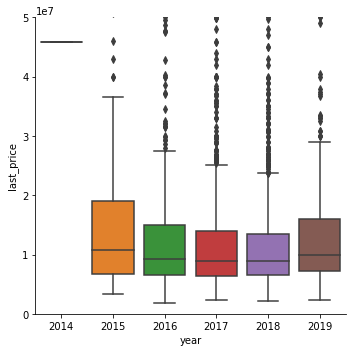

In [56]:
sns.catplot(x='year', y='last_price', kind='box', data=spb_center)
plt.ylim(0, 50000000)

В 2014 было очень мало продаж квартир, возможно в Питере люди лучше пнимали, что это не самое выгодное время для покупки квартир. Средняя стоимость в другие годы была выше, чем в целом по выборке, что логично для крупного города.

## Общий вывод

Квартира в среднем должна продаваться за 2-3 месяца, меньше 1 и больше 15 это уже аномальные значения.
Центром города для Питербурга является радиус в 8 км.

Для стоимости квартиры решающими факторами являются:
- Площадь квартиры и этот фатор сильнее для маленьких площадей, а также он сильнее для центра Питербурга, чем для всей выборки.
- Число комнат влияет сильно слабее, чем общая площадь, но для центра это влияние сильнее
- Этаж влиет только если он первый, это понижает стоимость, это влияние сильнее для центра.


<div class="alert alert-success">
<h2> Комментарий от ревьюера<a class="tocSkip"></a></h2>

Поздравляю с успешным проектом!

- Ты хорошо делаешь выводы и анализируешь результаты.
    
- Код написан аккуратно и качественно, видно, что есть какой-то определенный бэкграунд.

- Соблюдена структура проекта, было приятно проверять:)
    
- Все написано четко и по делу

 


Желаю дальнейших успехов!


</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод